# Analysis name
**details details details**

**Instructions on how to set up the environment**

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import jacks
import jacks_tools
import os
import sys
from crispr_scripts import count_reads

In [2]:
print(sys.version)
for pkg in pd, np, matplotlib, count_reads:
    print(pkg.__name__, pkg.__version__, sep='\t')
    

3.6.5 |Anaconda, Inc.| (default, Mar 29 2018, 13:14:23) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
pandas	0.23.0
numpy	1.15.1
matplotlib	2.2.2
crispr_scripts.count_reads	1.2.1


In [8]:
# navigate to working directory
os.chdir('/Users/johnc.thomas/tmp/tst/')

# commands preceeded by `!` are passed to bash
# get checksums for all sequence files
!md5 *
!mkdir counts

md5: counts: Is a directory
MD5 (tst1_L001_R1_.fastq) = 38b24fca10401cd5ac06f503776ee8d1
MD5 (tst1_L002_R1_.fastq) = ee76b235c55b44df5a62d436d14c01af
MD5 (tst2_L001_R1_.fastq) = 7b1b13b88e075a75f12562b43fdaa7dd
mkdir: counts: File exists


In [9]:
# Look at some sequences to check the read length and for anything weird
!head tst1_L001_R1_.fastq

@L180:623:HFJ73BCX2:1:1101:1169:2071 1:N:0:CGGAGCCT
NGCACGACGAGCCATGCTACG
+
#<GGGIIIIIIIIIIIIIIII
@L180:623:HFJ73BCX2:1:1101:1193:2131 1:N:0:CGGAGCCT
GTGCTCACGTGCCACACGTGG
+
GGGGGIIIIIIIIIIIIIIII
@L180:623:HFJ73BCX2:1:1101:1249:2145 1:N:0:CGGAGCCT
GGCCGCCTGGACTACTGCGGG


In [10]:
print(count_reads.run.__doc__)

Write a table giving the frequency of all unique sequences from a fastq
    files (or fastq.gz).

    Output filenames are derived from input filenames.

    Merge_samples looks for file names containing "_L001_" and assumes all
    files with the same prefix are the same sample.

    Arguments:
        files       A list of files or dir. All files in given dir that end
                       with .fastq or .fastq.gz or .fq will be counted.

        slicer (M,N)  Slice indicies to truncate sequences (zero indexed,
                        end exclusive). Comma-sep ints. Required.

        fn_prefix   Prefix added to output files, can include absolute or
                       relative paths.

        fn_suffix   Suffix added to output files, .txt added after. Default
                       `rawcount`

        fn_split    String used to split filenames and form output file prefix.
                       Default `_R1_`. Doesn't do anything if --merge-samples is
                       used

In [5]:
fq = !ls *.fastq
count_reads.run(fq, (1,20), './counts/', merge_samples=True)


input files
tst1_L001_R1_.fastq
tst1_L002_R1_.fastq
tst2_L001_R1_.fastq
Length=19 

Samples found: {'tst2', 'tst1'}
4 sequences counted.
4 sequences counted.
4 sequences counted.


In [7]:
!ls counts

tst1.rawcount.txt tst2.rawcount.txt


In [13]:
counts = {}
for fn in os.listdir('counts'):
    k = fn.split('.')[0]
    counts[k] = pd.read_table(f'counts/{fn}', header=None, index_col=0)
counts[k].head()

,1
0,
GTGCGCTACTTCGAGTGCC,1
ATAAACCATCTCCACCAAA,1
TTGTGCCTTCCGCCACCGA,1
CTGTTTTGAAGTCGCATCG,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1170f5cf8>]],
      dtype=object)

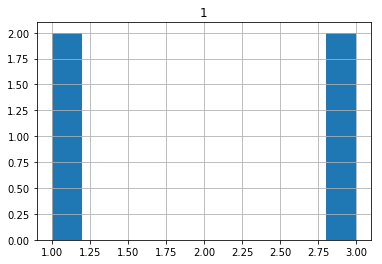

In [17]:
counts['tst1'].hist()